# EDA of Human Activity Recognition with Smartphones


## I. Tổng quan về bộ dữ liệu


### 1. Mô tả bài toán

Bài toán mà bộ dữ liệu **Human Activity Recognition (HAR) with Smartphones** đặt ra là nhận dạng và phân loại các hoạt động của con người dựa trên dữ liệu thu thập từ các cảm biến gia tốc kế và con quay hồi chuyển tích hợp trong điện thoại thông minh. 

Dữ liệu được ghi lại khi các tình nguyện viên thực hiện 6 hoạt động khác nhau: 
- Đi bộ (**WALKING**)
- Đi bộ lên cầu thang (**WALKING_UPSTAIRS**)
- Đi bộ xuống cầu thang (**WALKING_DOWNSTAIRS**)
- Ngồi (**SITTING**)
- Đứng (**STANDING**)
- Nằm (**LAYING**)

Mỗi người đeo một điện thoại thông minh (Samsung Galaxy S II) ở vị trí hông, và dữ liệu từ gia tốc kế và con quay hồi chuyển 3 trục được thu thập với tần số 50Hz.

### 2. Thu thập dữ liệu
- Dữ liệu được thu thập từ 30 người tham gia (độ tuổi 19-48), thực hiện 6 hoạt động nói trên.
- Điện thoại thông minh được gắn ở hông, thu thập tín hiệu từ cảm biến gia tốc kế và con quay hồi chuyển 3 trục (X-Y-Z).
- Dữ liệu được thu thập ở tần số 50Hz.
- Tín hiệu cảm biến đã được tiền xử lý bằng cách áp dụng các bộ lọc nhiễu.
- Được lấy mẫu trong các cửa sổ có chiều rộng cố định (sliding windows) trong 2,56 giây mỗi cửa sổ với độ chồng chéo 50%. Mỗi cửa sổ có 128 giá trị (64 giá trị cũ + 64 giá trị mới)).
##### Chi tiết cụ thể:
- **Cửa sổ thời gian (window size)**: 2.56 giây.
- **Tần số lấy mẫu (sampling rate)**: 50 Hz (nghĩa là dữ liệu được thu thập 50 mẫu mỗi giây từ các cảm biến).
- **Số lượng mẫu trong mỗi cửa sổ**: 128 mẫu. 
###### Nghĩa là: 2.56 giây x 50 mẫu/giây = 128 mẫu/cửa sổ.

- Tín hiệu gia tốc từ cảm biến được chia thành hai thành phần: 
  - Gia tốc của cơ thể (body acceleration) 
  - Gia tốc trọng lực (gravity acceleration)
- Thành phần gia tốc trọng lực chỉ bao gồm các tần số thấp, do đó sử dụng bộ lọc Butterworth với tần số cắt 0.3 Hz.


### 3. Phân chia dữ liệu
- Bộ dữ liệu được chia ngẫu nhiên thành hai tập: 
  - 70% cho tập huấn luyện
  - 30% cho tập kiểm tra.

### 4. Mục tiêu

Mục tiêu chính của bài toán là phát triển một mô hình phân loại chính xác, có thể tự động nhận diện hoạt động của con người từ dữ liệu cảm biến của điện thoại thông minh. Các ứng dụng tiềm năng của mô hình bao gồm:
- Theo dõi sức khỏe
- Phát hiện té ngã
- Hỗ trợ các hoạt động thể chất trong cuộc sống hàng ngày.



### 5. Các đặc trưng (Features)

Bộ dữ liệu **Human Activity Recognition with Smartphones** chứa một số lượng lớn các đặc trưng ***(562 features + 1 target)*** được trích xuất từ dữ liệu cảm biến của điện thoại thông minh, bao gồm dữ liệu từ **gia tốc kế (accelerometer** và **con quay hồi chuyển (gyroscope)**. Các đặc trưng này được trích xuất từ các cửa sổ dữ liệu với độ dài cố định 2.56 giây và độ trùng lặp 50%. Dưới đây là mô tả các nhóm đặc trưng chính:

#### 5.1. Giá trị từ miền thời gian
Các giá trị này phản ánh chuyển động tức thời của cơ thể theo ba hướng khác nhau (X, Y, Z): 
- **tBodyAcc-XYZ**: Gia tốc của cơ thể theo ba trục X, Y, Z.
    - tBodyAcc-X
    - tBodyAcc-Y
    - tBodyAcc-Z
- **tGravityAcc-XYZ**: Gia tốc trọng lực tác dụng lên thiết bị theo ba trục X, Y, Z.
- **tBodyAccJerk-XYZ**: Gia tốc của cơ thể theo ba trục X, Y, Z, với Jerk là tốc độ thay đổi của gia tốc.
- **tBodyGyro-XYZ**: Vận tốc góc của cơ thể theo ba trục X, Y, Z.
- **tBodyGyroJerk-XYZ**: Vận tốc góc của cơ thể theo ba trục X, Y, Z, với Jerk là tốc độ thay đổi của vận tốc góc.
- **tBodyAccMag**: Độ lớn của gia tốc cơ thể.
- **tGravityAccMag**: Độ lớn của gia tốc trọng lực.
- **tBodyAccJerkMag**: Độ lớn của gia tốc cơ thể với Jerk.
- **tBodyGyroMag**: Độ lớn của vận tốc góc cơ thể.
- **tBodyGyroJerkMag**: Độ lớn của vận tốc góc cơ thể với Jerk.

#### 5.2. Giá trị từ miền tần số
Các đặc trưng từ miền tần số được tính toán bằng cách áp dụng phép biến đổi Fourier nhanh (Fast Fourier Transform - FFT) lên dữ liệu cảm biến:
- **fBodyAcc-XYZ**: Biến đổi Fourier của gia tốc cơ thể theo ba trục X, Y, Z. 
- **fBodyAccJerk-XYZ**: Biến đổi Fourier của gia tốc Jerk cơ thể theo ba trục X, Y, Z.
- **fBodyGyro-XYZ**: Biến đổi Fourier của vận tốc góc cơ thể theo ba trục X, Y, Z.
- **fBodyAccMag**: Biến đổi Fourier của độ lớn gia tốc cơ thể.
- **fBodyAccJerkMag**: Biến đổi Fourier của độ lớn gia tốc Jerk cơ thể.
- **fBodyGyroMag**: Biến đổi Fourier của độ lớn vận tốc góc cơ thể.
- **fBodyGyroJerkMag**: Biến đổi Fourier của độ lớn vận tốc góc Jerk cơ thể.

#### 5.3. Đặc trưng thống kê
Từ các tín hiệu cảm biến, các giá trị từ miền thời gian và miền tần số được thống kê theo từng cửa sổ dữ liệu. Các kết quả thống kê sẽ được sử dụng làm các đặc trưng cho mô hình.
1. **Mean**: Giá trị trung bình.
    - tBodyAcc-mean()-X
    - tBodyAcc-mean()-Y
    - tBodyAcc-mean()-Z
2. **STD**: Độ lệch chuẩn.
3. **MAD**: Mean absolute deviation (độ lệch tuyệt đối trung bình).
4. **Max**: Giá trị lớn nhất.
5. **Min**: Giá trị nhỏ nhất.
6. **SMA**: Signal magnitude area (diện tích độ lớn tín hiệu).
7. **Energy**: Năng lượng tín hiệu.
8. **IQR**: Interquartile range (phạm vi tứ phân vị).
9. **Entropy**: Độ bất định của tín hiệu.
10. **AR coefficients**: Hệ số của mô hình tự hồi quy (1, 2, 3, 4).
11. **Correlation**: Hệ số tương quan giữa các trục ([X, Y], [X, Z], [Y, Z]).
12. **Max frequency**: Tần số tại đỉnh phổ (max frequency component).
13. **Skewness**: Độ xiên của phân phối dữ liệu.
14. **Kurtosis**: Độ nhọn của phân phối dữ liệu.

**Ví dụ:**
- tBodyAcc-mean()-X là đặc trưng trung bình của gia tốc cơ thể theo trục X, được tính từ 128 điểm dữ liệu trong một cửa sổ thời gian dài 2.56 giây.



#### 5.4. Đặc trưng tổng hợp
- Các đặc trưng được tính toán từ cả hai miền thời gian và tần số, bao gồm:
  - Các biến liên quan đến gia tốc và vận tốc góc.
  - Độ lớn của tín hiệu (Magnitude) giúp mô tả tổng hợp ba trục.
  - Biến đổi Fourier và các đặc trưng thống kê giúp cung cấp thông tin chi tiết về tần số của tín hiệu.

#### 5.5. Đặc trưng subject
- Mỗi mẫu dữ liệu được gán nhã cho một tình nguyện viên (subject) tham gia thu thập dữ liệu. 


Tổng cộng, bộ dữ liệu chứa 562 đặc trưng cho mỗi mẫu, giúp mô hình học máy có thể nhận diện chính xác các hoạt động của người dùng từ dữ liệu cảm biến của điện thoại thông minh.


## II. Khám phá dữ liệu

### 1. Load dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("../../data/raw/train.csv")
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


#### 2. Kiểm tra các giá trị null

In [3]:
flag = False
for col in train_data.columns:
    if train_data[col].isnull().sum() > 0:
        print(f"Feature '{col}' có {train_data[col].isnull().sum()} giá trị null.")
        flag = True
if not flag:
    print("Không có giá trị null (NaN) trong dữ liệu.")
        

Không có giá trị null (NaN) trong dữ liệu.


### 3. Tính cân bằng của dữ liệu

#### 3.1. Phần trăm dữ liệu cho mỗi hoạt động

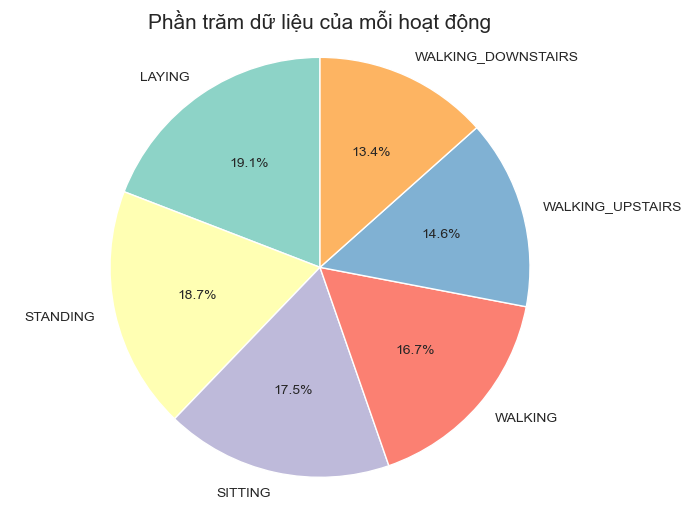

In [4]:
# Tính số lượng và phần trăm của mỗi loại hoạt động
activity_counts = train_data['Activity'].value_counts()
activity_percent = 100 * activity_counts / activity_counts.sum()

# Chọn tông màu từ seaborn
colors = sns.color_palette("Set3", len(activity_percent))

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(activity_percent, labels=activity_percent.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Phần trăm dữ liệu của mỗi hoạt động', fontsize=15)
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()


**Nhận xét:**
Dữ liệu của mỗi hoạt động không quá chênh lệch, có thể xem là cân bằng tốt.

#### 3.2. Phần trăm dữ liệu cho mỗi tình nguyện viên

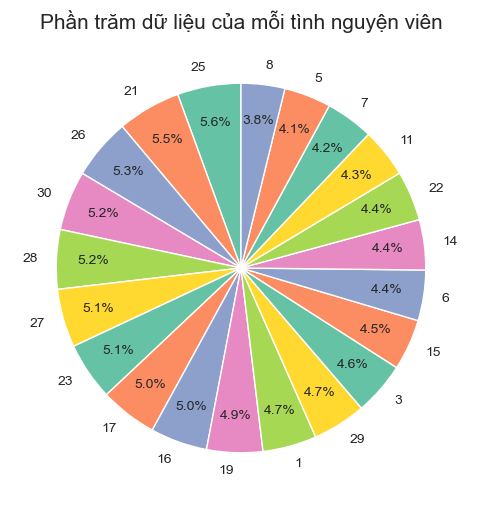

In [5]:
subject_counts = train_data['subject'].value_counts()
subject_percent = 100 * subject_counts / subject_counts.sum()

colors = sns.color_palette("Set2", len(activity_percent))
plt.figure(figsize=(12, 6))
plt.pie(subject_percent, labels=subject_percent.index, 
                            autopct='%1.1f%%', 
                            startangle=90, 
                            colors=colors,
                            pctdistance=0.8);
plt.title('Phần trăm dữ liệu của mỗi tình nguyện viên', fontsize=15);

**Nhận xét:**
Dữ liệu được thu thập từ 30 tình nguyện viên, mỗi người tham gia vào việc thu thập dữ liệu với số lượng mẫu tương đối đồng đều. Tình nguyện viên thứ 8 có số lượng mẫu ít nhất, tuy nhiên là không đáng kể.

#### 3.3. Số lương dữ liệu cho mỗi hoạt động trên từng tình nguyện viên

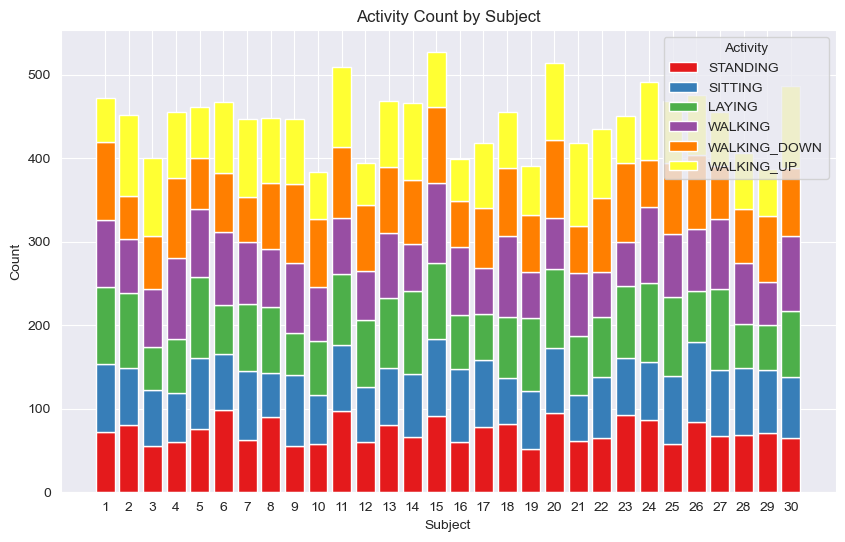

In [6]:
# Giả lập dữ liệu (các hoạt động và subjects)
subjects = np.arange(1, 31)  # 30 subjects
activities = ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWN', 'WALKING_UP']

# Giả lập số lượng mỗi hoạt động theo từng subject
data = np.random.randint(50, 100, size=(len(activities), len(subjects)))
# Xây dựng biểu đồ
colors = sns.color_palette("Set1", len(activities))
fig, ax = plt.subplots(figsize=(10, 6))

# Tạo biểu đồ cột xếp chồng
bottom = np.zeros(len(subjects))  # Điểm bắt đầu là 0 cho mỗi cột
for i, activity in enumerate(activities):
    ax.bar(subjects, data[i], bottom=bottom, label=activity, color=colors[i])
    bottom += data[i]

# Cài đặt hiển thị
ax.set_xlabel('Subject')
ax.set_ylabel('Count')
ax.set_title('Activity Count by Subject')
ax.legend(title='Activity', loc='upper right')

plt.xticks(subjects, rotation=0)
plt.show()


**Nhận xét:**
Lương dữ liệu cho mỗi hoạt động trên từng tình nguyện viên chênh lệch nhỏ (2-5%)

### 4. Phân tích tương quan giữa các trục X, Y, Z

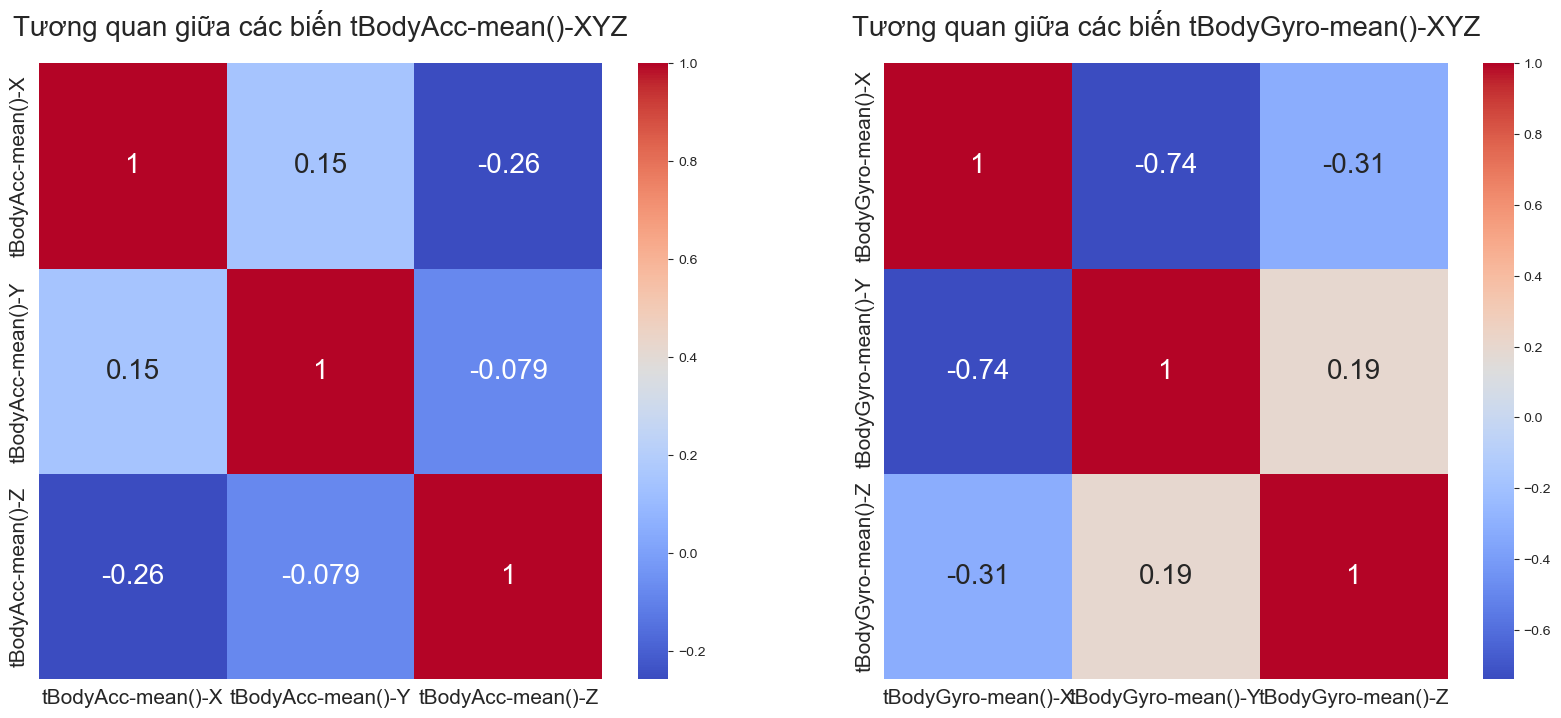

In [7]:
features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
corr_matrix_acc = train_data[features].corr()
features = ['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']
corr_matrix_gyro = train_data[features].corr()

plt.figure(figsize=(20, 8))
ax1 = plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix_acc, annot=True, cmap='coolwarm', annot_kws={"size": 20})
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=15)
ax1.set_title('Tương quan giữa các biến tBodyAcc-mean()-XYZ', fontsize=20, pad=20)

ax2 = plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix_gyro, annot=True, cmap='coolwarm', annot_kws={"size": 20})
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=15)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=15)
ax2.set_title('Tương quan giữa các biến tBodyGyro-mean()-XYZ', fontsize=20, pad=20)

plt.show()


**Chú thích:** Ma trận tương quan đối với các trục X, Y, Z trên lấy đại diện là đặc trưng `tBodyAcc-mean()-X,Y,Z` và `tBodyGyro-mean()-X,Y,Z`. 

**Nhận xét:** Không có tương quan mạnh giữa các trục X, Y, Z. Cho thấy cả 3 trục đều cung cấp thông tin hữu ích cho việc phân loại hoạt động.

In [8]:
# # Import các thư viện cần thiết
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# # Đọc dữ liệu huấn luyện và kiểm tra
# train_data = pd.read_csv("../../data/raw/train.csv")  # Thay bằng đường dẫn thực tế
# test_data = pd.read_csv("../../data/raw/test.csv")    # Thay bằng đường dẫn thực tế
# 
# 
# # Kiểm tra tương quan giữa các biến
# # Chọn một vài cột đặc trưng ví dụ (đặc trưng gia tốc)
# features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
# corr_matrix = train_data[features].corr()
# 
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Ma trận tương quan giữa các biến tBodyAcc-mean()')
# plt.show()
# 
# # Phân tích phân phối của một số đặc trưng
# plt.figure(figsize=(12, 6))
# 
# for i, feature in enumerate(features):
#     plt.subplot(1, 3, i+1)
#     sns.histplot(train_data[feature], kde=True)
#     plt.title(f'Phân phối của {feature}')
# 
# plt.tight_layout()
# plt.show()
# 
# # Phân tích mối quan hệ giữa các đặc trưng và hoạt động
# plt.figure(figsize=(14, 8))
# sns.boxplot(x='Activity', y='tBodyAcc-mean()-X', data=train_data)
# plt.title('Boxplot của tBodyAcc-mean()-X với các hoạt động')
# plt.xticks(rotation=45)
# plt.show()
# 
# # Phân tích độ lớn tín hiệu (Signal Magnitude Area - SMA)
# train_data['SMA'] = train_data[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']].apply(np.linalg.norm, axis=1)
# 
# plt.figure(figsize=(12, 6))
# sns.histplot(data=train_data, x='SMA', hue='Activity', kde=True)
# plt.title('Phân phối của độ lớn tín hiệu (SMA) với các hoạt động')
# plt.show()
# 
# # Phân tích thời gian thực hiện các hoạt động
# activity_duration = train_data['Activity'].value_counts()
# 
# plt.figure(figsize=(10, 6))
# activity_duration.plot(kind='bar', color='skyblue')
# plt.title('Số lượng mẫu cho từng hoạt động')
# plt.xticks(rotation=45)
# plt.show()
# 
# # Kiểm tra phân phối của các đặc trưng trong miền thời gian và tần số
# time_features = [col for col in train_data.columns if 'mean()' in col or 'std()' in col]
# freq_features = [col for col in train_data.columns if 'fBody' in col]
# 
# # Đặc trưng miền thời gian
# plt.figure(figsize=(12, 6))
# train_data[time_features].mean().plot(kind='bar', color='coral')
# plt.title('Giá trị trung bình của các đặc trưng miền thời gian')
# plt.show()
# 
# # Đặc trưng miền tần số
# plt.figure(figsize=(12, 6))
# train_data[freq_features].mean().plot(kind='bar', color='lightblue')
# plt.title('Giá trị trung bình của các đặc trưng miền tần số')
# plt.show()


### Mật độ gia tốc của hoạt động tĩnh và động

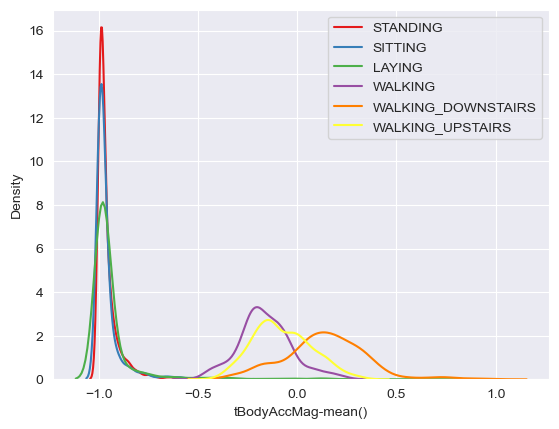

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv("../../data/raw/train.csv")

sns.set_palette("Set1")

# Vẽ biểu đồ KDE cho từng hoạt động
activities = train_data['Activity'].unique()
for activity in activities:
    subset = train_data[train_data['Activity'] == activity]
    sns.kdeplot(subset['tBodyAccMag-mean()'], label=activity)

plt.legend()
plt.show()


**Nhận xét:** Hoạt động tĩnh và động có sự tách biệt mật độ rõ ràng khi được đo bằng gia tốc kế (3 hoạt động có sự di chuyển nhiều được vẽ ở bên trái, 3 hoạt động tĩnh được vẽ ở bên phải)


In [10]:
# PCA
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# 
# 
# train_data = pd.read_csv("../../data/raw/train.csv")
# 
# X = train_data.drop('Activity', axis=1)
# y = train_data['Activity']
# 
# # Thực hiện PCA, giảm xuống 2 chiều
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)
# 
# 
# # Vẽ biểu đồ trực quan hóa dữ liệu sau PCA
# plt.figure(figsize=(8, 6))
# ax = plt.subplot(111)
# for i, target_name in enumerate(['0', '1','2', '3','4', '5']):
#     ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=0.8, label=target_name)
# 
# plt.legend()
# plt.title("PCA on Heart disease Dataset")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.grid()
# plt.show()


In [11]:
# pca.explained_variance_ratio_.sum()

NameError: name 'pca' is not defined